In [1]:
from langgraph.graph import StateGraph,START,END
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI
from typing import TypedDict

In [2]:
load_dotenv()

True

In [3]:
llm = ChatOpenAI()

In [4]:
class State(TypedDict):
    topic:str
    outline:str
    blog:str

In [6]:
def get_outline(state:State) -> dict:
    topic = state.get("topic")
    prompt = f"give the detailed outline of this topic: {topic}"
    outline = llm.invoke(prompt).content
    state["outline"] = outline
    return state
def get_blog(state:State) ->dict:
    topic = state.get("topic")
    outline = state.get("outline")
    prompt = f"write a detailed blog on topic:{topic} using this outline:\n\n {outline}"
    blog = llm.invoke(prompt).content
    state["blog"] = blog
    return state

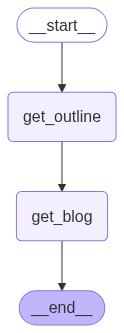

In [7]:
graph = StateGraph(State)
graph.add_node("get_outline",get_outline)
graph.add_node("get_blog",get_blog)
graph.add_edge(START,"get_outline")
graph.add_edge("get_outline","get_blog")
graph.add_edge("get_blog",END)
graph.compile()

In [8]:
workflow = graph.compile()

In [9]:
initial_state = {"topic":"Machine Learning and Mathematics"}
final_state = workflow.invoke(initial_state)
print(final_state)

{'topic': 'Machine Learning and Mathematics', 'outline': 'I. Introduction\n    A. Definition of Machine Learning\n    B. Importance of Mathematics in Machine Learning\n\nII. Fundamental Concepts of Mathematics in Machine Learning\n    A. Linear Algebra\n        1. Matrices and Vectors\n        2. Matrix Operations\n        3. Eigenvalues and Eigenvectors\n    B. Calculus\n        1. Derivatives\n        2. Gradients\n        3. Optimization\n    C. Probability and Statistics\n        1. Probability Theory\n        2. Bayes’ Theorem\n        3. Hypothesis Testing\n\nIII. Applications of Mathematics in Machine Learning\n    A. Supervised Learning\n        1. Linear Regression\n        2. Support Vector Machines\n        3. Neural Networks\n    B. Unsupervised Learning\n        1. Clustering\n        2. Dimensionality Reduction\n        3. Generative Models\n\nIV. Advanced Mathematical Techniques in Machine Learning\n    A. Convex Optimization\n    B. Information Theory\n    C. Bayesian I

In [10]:
print(final_state["outline"])

I. Introduction
    A. Definition of Machine Learning
    B. Importance of Mathematics in Machine Learning

II. Fundamental Concepts of Mathematics in Machine Learning
    A. Linear Algebra
        1. Matrices and Vectors
        2. Matrix Operations
        3. Eigenvalues and Eigenvectors
    B. Calculus
        1. Derivatives
        2. Gradients
        3. Optimization
    C. Probability and Statistics
        1. Probability Theory
        2. Bayes’ Theorem
        3. Hypothesis Testing

III. Applications of Mathematics in Machine Learning
    A. Supervised Learning
        1. Linear Regression
        2. Support Vector Machines
        3. Neural Networks
    B. Unsupervised Learning
        1. Clustering
        2. Dimensionality Reduction
        3. Generative Models

IV. Advanced Mathematical Techniques in Machine Learning
    A. Convex Optimization
    B. Information Theory
    C. Bayesian Inference
    D. Reinforcement Learning

V. Challenges and Future Directions
    A. Handli

In [13]:
print(final_state["blog"])

Machine learning has become an increasingly popular and powerful tool in a wide range of industries, from self-driving cars to personalized recommendation systems. At its core, machine learning is the process of teaching computers to learn from data and make decisions or predictions without being explicitly programmed to do so. However, behind the scenes of this complex and innovative technology lies a strong foundation of mathematics. In this blog, we will delve into the profound connection between machine learning and mathematics, exploring how mathematical concepts form the building blocks of machine learning algorithms, applications, and advancements.

I. Introduction

A. Definition of Machine Learning
Machine learning is a subset of artificial intelligence that focuses on developing algorithms and models that enable computers to learn from and make predictions or decisions based on data. These algorithms are designed to improve their performance over time through experience, witho